### Práctica 7
## Tema: Creación de clusters utilizando K-means
#### Objetivos:
    1. Utilizar K-meas para realizar una agrupación de datos no supervisados.
    2. Determinar cuál es el número de cluster necesarios para la agrupación de los datos.
    3. Realizar predicciones con datos nuevos.


### Instrucciones
    1. Descargue los dataset train y test desde el EVA.
    2. Realice las tareas señaladas en la sección actividades.
    3. Suba el archivo .ipynb al eva

### Actividades a desarrollar
    1. Con el archivo denominado train realice un análisis exploratorio de datos.

In [1]:
import pandas as pd
df = pd.read_csv('train.csv')

In [2]:
df

,V1,V2,V3,V4
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
142,6.7,3.0,5.2,2.3
143,6.3,2.5,5.0,1.9
144,6.5,3.0,5.2,2.0
145,6.2,3.4,5.4,2.3


In [3]:
print(df.head())


    V1   V2   V3   V4
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2


In [4]:
print(df.describe())

               V1          V2          V3          V4
count  147.000000  147.000000  147.000000  147.000000
mean     5.845578    3.049660    3.762585    1.199320
std      0.833316    0.426739    1.767988    0.760092
min      4.300000    2.000000    1.000000    0.100000
25%      5.100000    2.800000    1.600000    0.300000
50%      5.800000    3.000000    4.400000    1.300000
75%      6.400000    3.300000    5.100000    1.800000
max      7.900000    4.400000    6.900000    2.500000


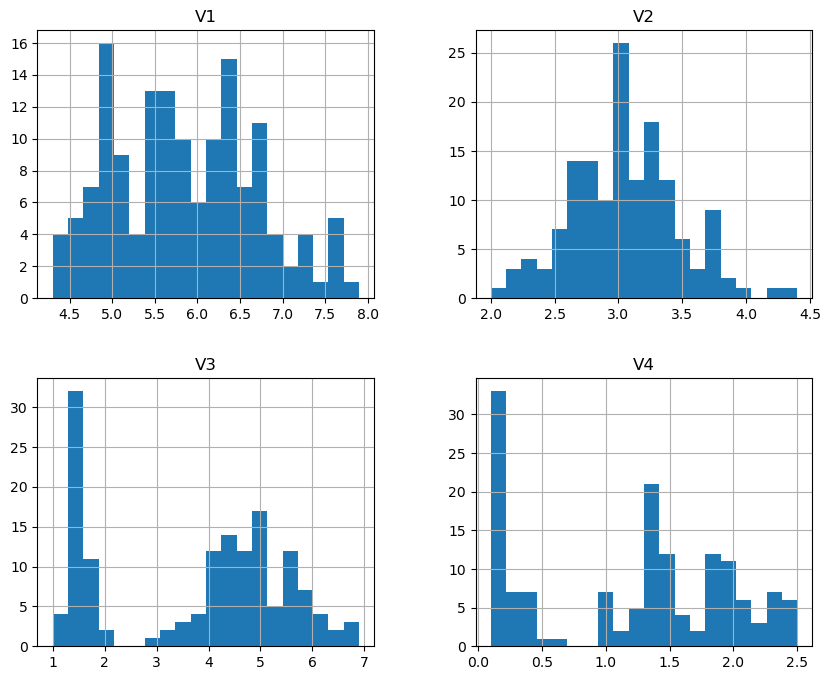

In [5]:
import matplotlib.pyplot as plt
df.hist(bins=20, figsize=(10, 8))
plt.show()

In [6]:
print(df.isnull().sum())

V1    0
V2    0
V3    0
V4    0
dtype: int64


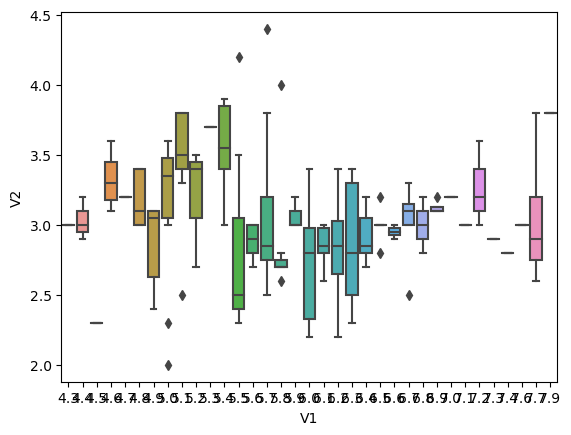

In [7]:
import seaborn as sns
sns.boxplot(x='V1', y='V2', data=df)
plt.show()

In [8]:
import numpy as np

X = np.array(df[['V1','V2','V3','V4']])
X.shape

(147, 4)

###  2. Utilice python  y la libreria K-means de Sklearn para poder realizar una agrupación de los datos utilizando todas las variables, con la finalidad de determinar si existe alguna relación entre los datos.


In [9]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters =5,
                            affinity = 'euclidean',
                            linkage = 'ward')
y_hc = hc.fit_predict(X)

/Users/santiagotene/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


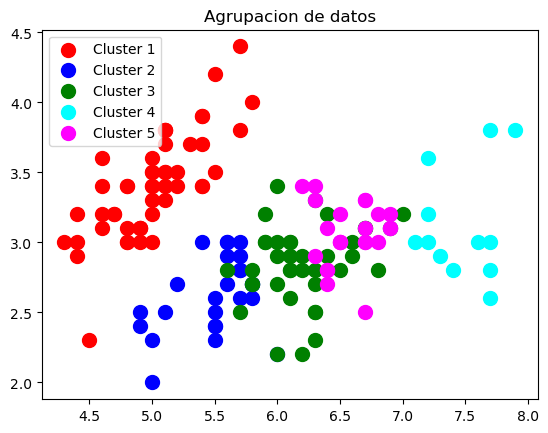

In [10]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Agrupacion de datos')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

### 3. Utilice el método del "Codo" para determinar el número de clusters necesarios para el ejercicio.

/Users/santiagotene/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/santiagotene/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/santiagotene/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/santiagotene/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

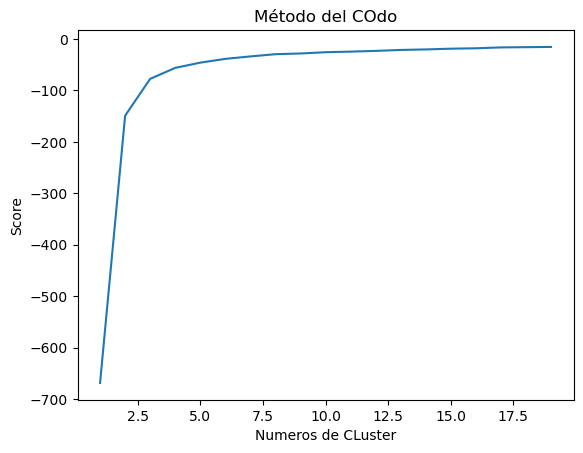

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Numeros de CLuster')
plt.ylabel('Score')
plt.title('Método del COdo')
plt.show()

Se puede observar que el codo se ubica en el nro 2 de cluster

In [12]:
kmeans = KMeans(n_clusters=2).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)
# Predicting the clusters
labels = kmeans.predict(X)
colores=['blue','red']

/Users/santiagotene/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[6.30736842 2.88736842 4.96631579 1.69578947]
 [5.00192308 3.34615385 1.56346154 0.29230769]]


Obtenemos los centroides

In [13]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

### Agregue al dataset una nueva variable de clase con los valores asignados por k-means para esto utilice la función labels_ de Kmeans


In [14]:
df['NuevaVariable'] = labels

In [15]:
df

,V1,V2,V3,V4,NuevaVariable
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
142,6.7,3.0,5.2,2.3,0
143,6.3,2.5,5.0,1.9,0
144,6.5,3.0,5.2,2.0,0
145,6.2,3.4,5.4,2.3,0


### Guarde el nuevo dataset en un archivo .csv

In [16]:
df.to_csv('dfTrainNew.csv')

In [17]:
train = pd.read_csv("dfTrainNew.csv",header=None)

In [18]:
train

,0,1,2,3,4,5
0,NaN,V1,V2,V3,V4,NuevaVariable
1,0.0,5.1,3.5,1.4,0.2,1
2,1.0,4.9,3.0,1.4,0.2,1
3,2.0,4.7,3.2,1.3,0.2,1
4,3.0,4.6,3.1,1.5,0.2,1
...,...,...,...,...,...,...
143,142.0,6.7,3.0,5.2,2.3,0
144,143.0,6.3,2.5,5.0,1.9,0
145,144.0,6.5,3.0,5.2,2.0,0
146,145.0,6.2,3.4,5.4,2.3,0


###    4. Una vez realizados los clusters con el archivo de test realiza predicciones y determinar a que cluster pertenecen esos datos.


In [23]:
copy =  pd.DataFrame()
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,blue,2
1,red,1


In [24]:
dfTest = pd.read_csv("test.csv",header=None)
dfTest

,0,1,2,3
0,5.2,4.1,1.5,0.1
1,5.6,2.5,3.9,1.1
2,6.4,3.2,5.3,2.3


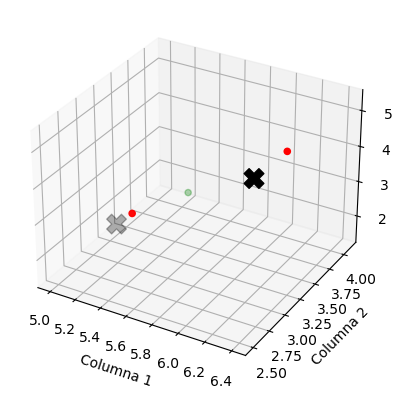

In [27]:
from mpl_toolkits.mplot3d import Axes3D

# Predecir las etiquetas de los clusters para el conjunto de datos de prueba
labels_test = kmeans.predict(dfTest)

# Colores para cada cluster
color = ['red', 'green', 'blue']
asignar_test = [color[row] for row in labels_test]

# Obtener los centroides de los clusters
C = kmeans.cluster_centers_

# Crear la figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot para los puntos de datos de prueba
ax.scatter(dfTest.iloc[:, 0], dfTest.iloc[:, 1], dfTest.iloc[:, 2], c=asignar_test, marker='o')

# Scatter plot para los centroides de los clusters
ax.scatter(C[:, 0], C[:, 1], C[:, 2], c='black', marker='X', s=200)

# Configuraciones adicionales si es necesario
ax.set_xlabel('Columna 1')
ax.set_ylabel('Columna 2')
ax.set_zlabel('Columna 3')

plt.show()


In [29]:
print(labels)


[1 0 0]


###    5. Agregue al dataset una nueva variable de clase con los valores asignados por k-means para esto utilice la función labels_ de Kmeans


In [31]:
dfTest['NuevaVariable'] = labels
dfTest

,0,1,2,3,NuevaVariable
0,5.2,4.1,1.5,0.1,1
1,5.6,2.5,3.9,1.1,0
2,6.4,3.2,5.3,2.3,0


In [33]:
dfTest.to_csv('dfTestNew.csv')


### Guarde el nuevo dataset en un archivo .csv

In [34]:
newTest = pd.read_csv("dfTestNew.csv",header=None)
newTest

,0,1,2,3,4,5
0,NaN,0.0,1.0,2.0,3.0,NuevaVariable
1,0.0,5.2,4.1,1.5,0.1,1
2,1.0,5.6,2.5,3.9,1.1,0
3,2.0,6.4,3.2,5.3,2.3,0


## Preguntas de control
    1. Cuál creee Usted que es el número correcto de clusters que se debe utilizar en el problema, explique el porqué.


Escogimos al 2 para los clusters en este problema. Usamos el método del codo y vimos que la curva cortaba en el 2, y las gráficas de dispersión también nos daban dos grupos bien marcados. Así que decidimos que esos datos eran los correctos para el problema.